In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Import necessary libraries
# Neural net will be constructed using tensorflow.keras

from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import numpy as np
from tensorflow import keras
# from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [0]:
new_model = keras.models.load_model('/content/gdrive/My Drive/DCGAN/dcgan_new_100e.h5')
rev_gen = keras.models.load_model('/content/gdrive/My Drive/DCGAN/reverse_generator.h5')

# load the data in from keras.datasets
(data,cifar_classes),(_,_) = keras.datasets.cifar10.load_data()
# Each element of data has dimension 32x32x3
# Convert data to from ints to floats
data = data.astype('float32')
# Map image data from [0,255] to [-1,1]
data = (data-127.5) / 127.5

170500096/170498071 [==============================] - 3s 0us/step


In [0]:
#outputs = np.random.randn(10000,100)
#inputs = new_model.layers[0](outputs)
inputs = np.load('/content/gdrive/My Drive/DCGAN/10000_gen_outs.npy')
outputs = np.load('/content/gdrive/My Drive/DCGAN/10000_latent_vecs.npy')

In [0]:
def reverse_generator(shape_in = (32,32,3)):
  model = keras.models.Sequential()

  model.add(keras.layers.Conv2D(128,(4,4),padding='same',input_shape=shape_in))
  model.add(keras.layers.LeakyReLU(alpha=0.2))

  model.add(keras.layers.Conv2D(128,(3,3),strides=(2,2),padding='same'))
  model.add(keras.layers.LeakyReLU(alpha=0.2))

  model.add(keras.layers.Conv2D(128,(3,3),strides=(2,2),padding='same'))
  model.add(keras.layers.LeakyReLU(alpha=0.2))

  model.add(keras.layers.Conv2D(256,(3,3),strides=(2,2),padding='same'))
  model.add(keras.layers.LeakyReLU(alpha=0.2))

  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dropout(0.4))

  model.add(keras.layers.Dense(100,activation='linear'))

  opt = keras.optimizers.Adam(learning_rate=0.0002,beta_1=0.5) #try lr = 0.0002 or 0.001
  model.compile(loss='mean_squared_error',optimizer=opt,metrics=['accuracy'])

  return model

In [0]:
#n_batch = 128
#train_data = tf.data.Dataset.from_tensor_slices(inputs).batch(n_batch)
#output_data = tf.data.Dataset.from_tensor_slices(outputs).batch(n_batch)

In [0]:
#def train(reverse_generator,train_data,output_data,epochs=100):
#  for i in range(epochs):
#    for (images,outs) in zip(train_data,output_data):
#      rev_loss,_ = reverse_generator.train_on_batch(images,outs)
#    print(i+1,rev_loss)




In [0]:
#opt = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.5) #try lr = 0.0002 or 0.001
#rev_gen.compile(loss='mean_squared_error',optimizer=opt,metrics=['accuracy'])

#train(rev_gen,train_data,output_data,epochs=15)

1 0.15571197867393494
2 0.16011279821395874
3 0.14631140232086182
4 0.14704173803329468
5 0.14795611798763275
6 0.1393493115901947
7 0.13510987162590027
8 0.14598797261714935
9 0.1458333134651184
10 0.1300942748785019
11 0.1332537978887558
12 0.14430707693099976
13 0.1321384459733963
14 0.13891467452049255
15 0.13455545902252197


In [0]:
#rev_gen.save('reverse_generator.h5')

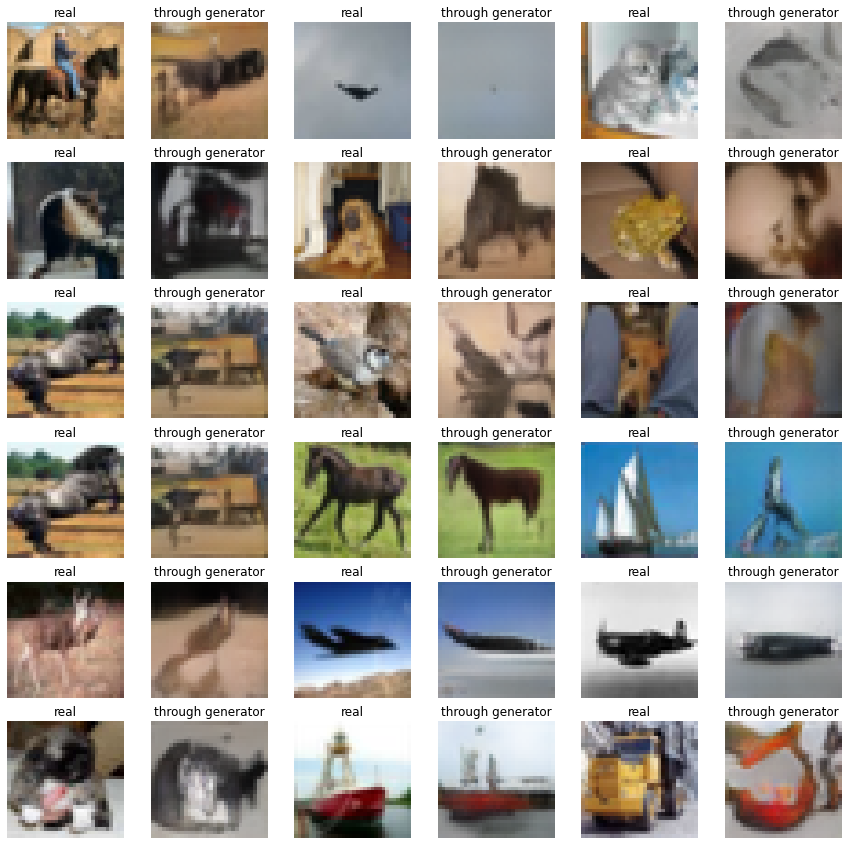

In [0]:
n = 6
g = 600
vs = rev_gen(data[0:g])
imgs = new_model.layers[0](vs)
j = 0

fig = plt.figure(figsize=(15,15))
for i in range(n**2):
  if i % 2 == 0:
    j = np.random.randint(0,g)
    plt.subplot(n, n, 1 + i)
    # turn off axis
    plt.axis('off')
    # plot raw pixel data
    plt.imshow((data[j, :, :]+1)/2)
    plt.title('real')
  else:
    plt.subplot(n, n, 1 + i)
    # turn off axis
    plt.axis('off')
    # plot raw pixel data
    plt.imshow((imgs[j, :, :]+1)/2)
    plt.title('through generator')

In [0]:
plt.savefig('books_read.png')

NameError: ignored

In [0]:
## airplane = 0, cars = 1, birds = 2, cats = 3, deer = 4, dogs = 5, frogs = 6, horses = 7, boats = 8, trucks = 9, 

airplane_true = cifar_classes == [0]
airplane_true = airplane_true.reshape(airplane_true.shape[0])
airplane_class = data[airplane_true]

car_true = cifar_classes == [1]
car_true = car_true.reshape(car_true.shape[0])
car_class = data[car_true]

bird_true = cifar_classes == [2]
bird_true = bird_true.reshape(bird_true.shape[0])
bird_class = data[bird_true]

cat_true = cifar_classes == [3]
cat_true = cat_true.reshape(cat_true.shape[0])
cat_class = data[cat_true]

deer_true = cifar_classes == [4]
deer_true = deer_true.reshape(deer_true.shape[0])
deer_class = data[deer_true]

dog_true = cifar_classes == [5]
dog_true = dog_true.reshape(dog_true.shape[0])
dog_class = data[dog_true]

frog_true = cifar_classes == [6]
frog_true = frog_true.reshape(frog_true.shape[0])
frog_class = data[frog_true]

horse_true = cifar_classes == [7]
horse_true = horse_true.reshape(horse_true.shape[0])
horse_class = data[horse_true]

boat_true = cifar_classes == [8]
boat_true = boat_true.reshape(boat_true.shape[0])
boat_class = data[boat_true]

truck_true = cifar_classes == [9]
truck_true = truck_true.reshape(truck_true.shape[0])
truck_class = data[truck_true]




In [0]:
airplane_reverse = rev_gen(airplane_class)
car_reverse = rev_gen(car_class)
bird_reverse = rev_gen(bird_class)
cat_reverse = rev_gen(cat_class)
deer_reverse = rev_gen(deer_class)
dog_reverse = rev_gen(dog_class)
frog_reverse = rev_gen(frog_class)
horse_reverse = rev_gen(horse_class)
boat_reverse = rev_gen(boat_class)
truck_reverse = rev_gen(truck_class)

In [0]:
generator = new_model.layers[0]

airplane_regenerated = generator(airplane_reverse)
car_regenerated = generator(car_reverse)
bird_regenerated = generator(bird_reverse)
cat_regenerated = generator(cat_reverse)
deer_regenerated = generator(deer_reverse)
dog_regenerated = generator(dog_reverse)
frog_regenerated = generator(frog_reverse)
horse_regenerated = generator(horse_reverse)
boat_regenerated = generator(boat_reverse)
truck_regenerated = generator(truck_reverse)

4806
594
4960
2731
4473
2661
151
493
256
4382


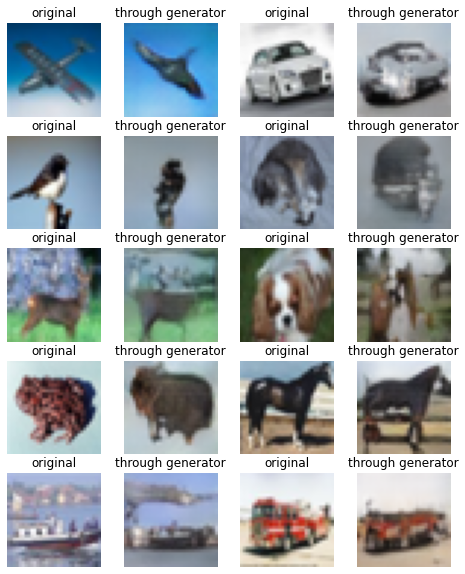

In [0]:

j = np.random.randint(0,5000)
print(j)

fig = plt.figure(figsize=(8,10));
plt.subplot(5,4,1);
plt.imshow((airplane_class[1336]+1)/2);plt.axis('off');plt.title('original');
plt.subplot(5,4,2);
plt.imshow((airplane_regenerated[1336]+1)/2);plt.axis('off');plt.title('through generator');

j = np.random.randint(0,5000)
print(j)

plt.subplot(5,4,3);
plt.imshow((car_class[4333]+1)/2);plt.axis('off');plt.title('original');
plt.subplot(5,4,4);
plt.imshow((car_regenerated[4333]+1)/2);plt.axis('off');plt.title('through generator');

j = np.random.randint(0,5000)
print(j)

plt.subplot(5,4,5);
plt.imshow((bird_class[837]+1)/2);plt.axis('off');plt.title('original');
plt.subplot(5,4,6);
plt.imshow((bird_regenerated[837]+1)/2);plt.axis('off');plt.title('through generator');

j = np.random.randint(0,5000)
print(j)

plt.subplot(5,4,7);
plt.imshow((cat_class[907]+1)/2);plt.axis('off');plt.title('original');
plt.subplot(5,4,8);
plt.imshow((cat_regenerated[907]+1)/2);plt.axis('off');plt.title('through generator');

j = np.random.randint(0,5000)
print(j)

plt.subplot(5,4,9);
plt.imshow((deer_class[2411]+1)/2);plt.axis('off');plt.title('original');
plt.subplot(5,4,10);
plt.imshow((deer_regenerated[2411]+1)/2);plt.axis('off');plt.title('through generator');

j = np.random.randint(0,5000)
print(j)

plt.subplot(5,4,11);
plt.imshow((dog_class[1645]+1)/2);plt.axis('off');plt.title('original');
plt.subplot(5,4,12);
plt.imshow((dog_regenerated[1645]+1)/2);plt.axis('off');plt.title('through generator');

j = np.random.randint(0,5000)
print(j)

plt.subplot(5,4,13);
plt.imshow((frog_class[1180]+1)/2);plt.axis('off');plt.title('original');
plt.subplot(5,4,14);
plt.imshow((frog_regenerated[1180]+1)/2);plt.axis('off');plt.title('through generator');

j = np.random.randint(0,5000)
print(j)

plt.subplot(5,4,15);
plt.imshow((horse_class[1196]+1)/2);plt.axis('off');plt.title('original');
plt.subplot(5,4,16);
plt.imshow((horse_regenerated[1196]+1)/2);plt.axis('off');plt.title('through generator');

j = np.random.randint(0,5000)
print(j)

plt.subplot(5,4,17);
plt.imshow((boat_class[2044]+1)/2);plt.axis('off');plt.title('original');
plt.subplot(5,4,18);
plt.imshow((boat_regenerated[2044]+1)/2);plt.axis('off');plt.title('through generator');

j = np.random.randint(0,5000)
print(j)

plt.subplot(5,4,19);
plt.imshow((truck_class[1774]+1)/2);plt.axis('off');plt.title('original');
plt.subplot(5,4,20);
plt.imshow((truck_regenerated[1774]+1)/2);plt.axis('off');plt.title('through generator');

plt.savefig('through_generator')